In [ ]:
import pandas as pd
import numpy as np
import sklearn.metrics as metrics
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

df1=pd.read_csv("/content/drive/MyDrive/Classroom/DS- Data set/chennai_House.csv")

In [ ]:
df1.head()

,price,area,status,bhk,bathroom,age,location,builder
0,37.49,872,Ready to move,2,NaN,1.0,Sembakkam,MP Developers
1,93.54,1346,Under Construction,3,2.0,NaN,Selaiyur,DAC Promoters
2,151.00,2225,Under Construction,3,NaN,0.0,Mogappair,Casagrand Builder Private Limited
3,49.00,1028,Ready to move,2,2.0,3.0,Ambattur,Dugar Housing Builders
4,42.28,588,Under Construction,2,1.0,0.0,Pallavaram,Radiance Realty Developers India Ltd


In [ ]:
!pip install sweetviz

In [ ]:
import sweetviz as sv
report=sv.analyze(df1)
report.show_html("./chennai_EDA.html")

                                             |          | [  0%]   00:00 -> (? left)

Report ./chennai_EDA.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
df1.shape

(2620, 8)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2620 entries, 0 to 2619
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     2620 non-null   float64
 1   area      2620 non-null   int64  
 2   status    2620 non-null   object 
 3   bhk       2620 non-null   int64  
 4   bathroom  1403 non-null   float64
 5   age       1729 non-null   float64
 6   location  2620 non-null   object 
 7   builder   2620 non-null   object 
dtypes: float64(3), int64(2), object(3)
memory usage: 163.9+ KB


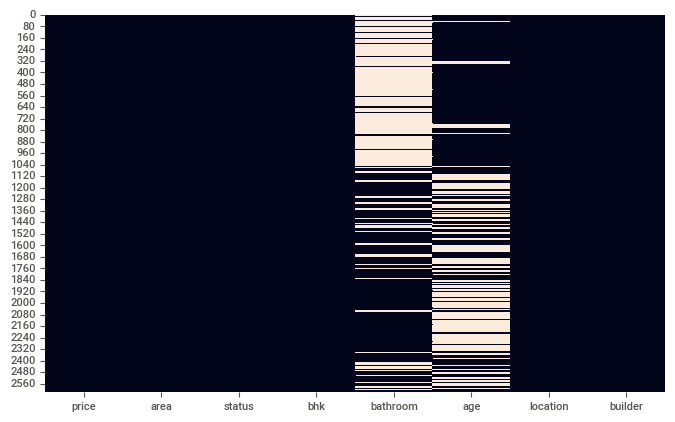

In [ ]:
plt.figure(figsize=(8, 5))
sns.heatmap(df1.isnull(), cbar=False)
plt.show()

In [ ]:
df1.isna().sum()

price          0
area           0
status         0
bhk            0
bathroom    1217
age          891
location       0
builder        0
dtype: int64

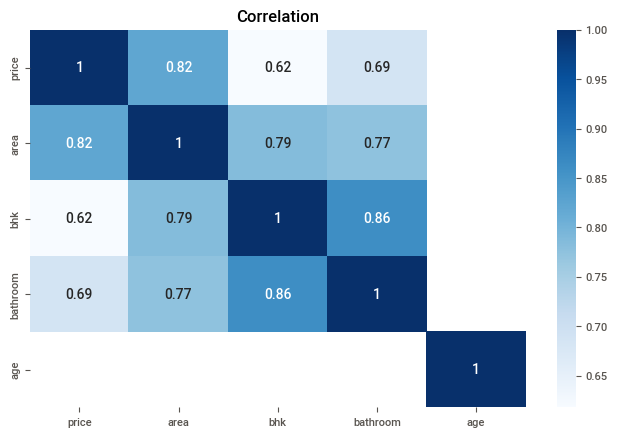

In [ ]:
corr = df1.corr()
plt.figure(figsize = (8,5))
plt.title('Correlation')
sns.heatmap(corr,mask = corr<0.6 ,annot= True,cmap = 'Blues')

In [ ]:
df2=df1.drop(['status','age','builder'],axis='columns')
df2.head()

,price,area,bhk,bathroom,location
0,37.49,872,2,NaN,Sembakkam
1,93.54,1346,3,2.0,Selaiyur
2,151.00,2225,3,NaN,Mogappair
3,49.00,1028,2,2.0,Ambattur
4,42.28,588,2,1.0,Pallavaram


In [ ]:
df2["bathroom"].fillna(-1, inplace = True)

In [ ]:
def bath_finder(x,y):
    if y == -1:
        if x >= 5:
            return x+1
        elif x == 4 | x == 3:
            return  x
        elif x == 1:
            return x
        else:
            return x-1
    else:
        return y
    
df2["bath"] = df2.apply(lambda x: bath_finder(x["bhk"], x["bathroom"]), axis = 1)

In [ ]:
df2=df2.drop(['bathroom'],axis='columns')

In [ ]:
df2.head()

,price,area,bhk,location,bath
0,37.49,872,2,Sembakkam,1.0
1,93.54,1346,3,Selaiyur,2.0
2,151.00,2225,3,Mogappair,2.0
3,49.00,1028,2,Ambattur,2.0
4,42.28,588,2,Pallavaram,1.0


In [ ]:
df2.location=df2.location.apply(lambda x: x.strip())
location_stats=df2.groupby('location')['location'].agg('count')
location_stats

location
Adambakam         8
Adyar            11
Agaramthen        7
Alandur           5
Alwarpet         11
                 ..
Virugambakkam     8
Washermanpet      1
West Mambalam    47
West Tambaram     7
tambaram west    14
Name: location, Length: 178, dtype: int64

In [ ]:
len(location_stats[location_stats<=5])

88

In [ ]:
location_stats_less_than_5 = location_stats[location_stats<=5]
location_stats_less_than_5

location
Alandur            5
Aminjikarai        4
Anna Nagar East    2
Arumbakkam         2
Ashok Nagar        1
                  ..
Velappanchavadi    4
Vellakkal          1
Veppampatttu       2
Villivakkam        1
Washermanpet       1
Name: location, Length: 88, dtype: int64

In [ ]:
df2.location = df2.location.apply(lambda x: 'other' if x in location_stats_less_than_5 else x)
len(df2.location.unique())

91

In [ ]:
df2['price_per_sqft'] = df2['price']*100000/df2['area']
df2.head()

,price,area,bhk,location,bath,price_per_sqft
0,37.49,872,2,Sembakkam,1.0,4299.311927
1,93.54,1346,3,Selaiyur,2.0,6949.479941
2,151.00,2225,3,Mogappair,2.0,6786.516854
3,49.00,1028,2,Ambattur,2.0,4766.536965
4,42.28,588,2,Pallavaram,1.0,7190.476190


In [ ]:
df2[(df2.area/df2.bhk<300)]


,price,area,bhk,location,bath,price_per_sqft
4,42.28,588,2,Pallavaram,1.0,7190.476190
6,38.00,885,3,Thirumazhisai,2.0,4293.785311
43,42.28,588,2,Pallavaram,1.0,7190.476190
54,29.62,528,2,Pammal,1.0,5609.848485
206,35.34,594,2,Vengaivasal,1.0,5949.494949
208,35.16,591,2,Vengaivasal,1.0,5949.238579
209,35.58,598,2,Vengaivasal,1.0,5949.832776
302,28.00,561,2,Thirumazhisai,1.0,4991.087344
304,30.00,576,2,Thirumazhisai,1.0,5208.333333
567,42.28,588,2,Pallavaram,1.0,7190.476190


In [ ]:
df2.shape

(2620, 6)

In [ ]:
df3 = df2[~(df2.area/df2.bhk<300)]
df3.shape

(2593, 6)

In [ ]:
df3.price_per_sqft.describe()

count     2593.000000
mean      6396.745568
std       3422.929203
min       1743.119266
25%       4606.060606
50%       5417.177914
75%       6640.625000
max      26086.956522
Name: price_per_sqft, dtype: float64

In [ ]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
    
df4 = remove_pps_outliers(df3)
df4.shape

(1990, 6)

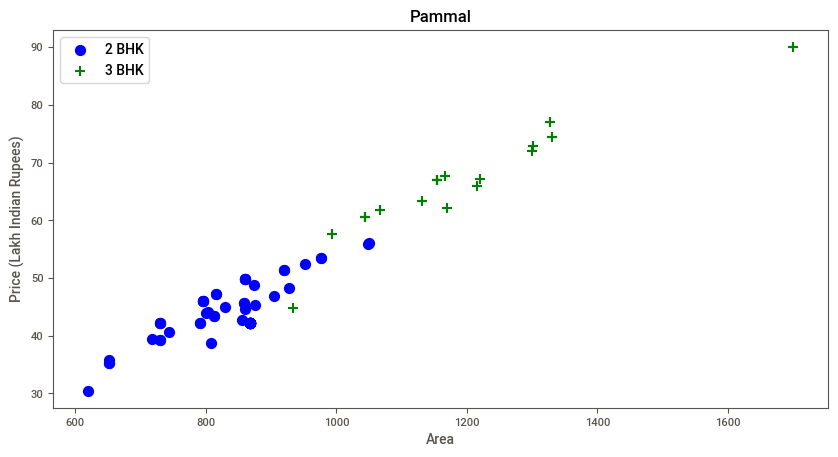

In [ ]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (10,5)
    plt.scatter(bhk2.area,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.area,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df4,"Pammal")

In [ ]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df5 = remove_bhk_outliers(df4)
df5.shape

(1682, 6)

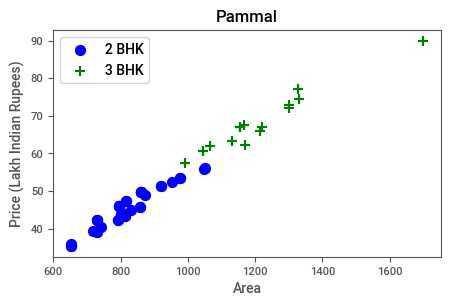

In [ ]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (5,3)
    plt.scatter(bhk2.area,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.area,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df5,"Pammal")

In [ ]:
df5[df5.bath>df5.bhk+2]

,price,area,bhk,location,bath,price_per_sqft
1886,350.0,3300,3,other,6.0,10606.060606


In [ ]:
dum1 = pd.get_dummies(df5.location)
df6= pd.concat(((df5,dum1)),axis=1)
df6.head()


,price,area,bhk,location,bath,price_per_sqft,Adambakam,Adyar,Agaramthen,Alwarpet,...,Vanagaram,Velachery,Vengaivasal,Vengambakkam,Veppampattu,Virugambakkam,West Mambalam,West Tambaram,other,tambaram west
0,82.0,960,2,Adambakam,2.0,8541.666667,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,77.8,890,2,Adambakam,2.0,8741.573034,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,82.0,1000,2,Adambakam,2.0,8200.000000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,87.0,1015,2,Adambakam,2.0,8571.428571,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,78.0,954,2,Adambakam,2.0,8176.100629,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df7=df6.drop(['price_per_sqft','location'],axis='columns')



In [ ]:
df7.head()

,price,area,bhk,bath,Adambakam,Adyar,Agaramthen,Alwarpet,Ambattur,Ambattur INDUSTRIAL ESTATE,...,Vanagaram,Velachery,Vengaivasal,Vengambakkam,Veppampattu,Virugambakkam,West Mambalam,West Tambaram,other,tambaram west
0,82.0,960,2,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,77.8,890,2,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,82.0,1000,2,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,87.0,1015,2,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,78.0,954,2,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
x1=df7.iloc[:,1:]
y1=df7.iloc[:,0]

In [ ]:
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 1/3, random_state = 0)

print(x1_train.shape)
print(x1_test.shape)

(1121, 94)
(561, 94)


In [ ]:
import warnings 
warnings.filterwarnings("ignore")

In [ ]:
#Multiple Linear Regression
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x1_train,y1_train)
print("Accuracy score",reg.score(x1_test,y1_test))
ml_pred = reg.predict(x1_test)

Accuracy score 0.9649114201815661


In [ ]:
#Ridge Regression
from sklearn.linear_model import Ridge
ridgeReg = Ridge(alpha=0.07, normalize=True)
ridgeReg.fit(x1_train,y1_train)
y2_pred = ridgeReg.predict(x1_test)
print("Accuracy score",ridgeReg.score(x1_test,y1_test))

Accuracy score 0.968669853703464


In [ ]:
#Lasso regression
from sklearn.linear_model import Lasso
lassoReg = Lasso(alpha=0.3, normalize=True)
lassoReg.fit(x1_train,y1_train)
print("Accuracy score",lassoReg.score(x1_test,y1_test))
lass_pred = lassoReg.predict(x1_test)

Accuracy score 0.8671107013797781


In [ ]:
#DecisionTreeRegressor 
from sklearn.tree import DecisionTreeRegressor 
regressor = DecisionTreeRegressor(random_state = 0) 
regressor.fit(x1_train,y1_train)
print("Accuracy score",regressor.score(x1_test,y1_test))
tree_pred = regressor.predict(x1_test)

Accuracy score 0.9398740978704139


In [ ]:
def Eval(y1_pred):
  d = y1_test-y1_pred
  mse_f = np.mean(d**2)
  mae_f = np.mean(abs(d))
  rmse_f = np.sqrt(mse_f)
  r2_f = 1-(sum(d**2)/sum((y1_test-np.mean(y1_test))**2))
  m=" "
  
  print(mae_f," |",mse_f," |",rmse_f," |",r2_f)
  #print("MAE      :",mae_f)
  #print("MSE      :", mse_f)
  #print("RMSE     :", rmse_f)
  #print("R-Squared:", r2_f)
  return(m)

print("      ","   Model                  MAE             MSE               RMSE               R-Squared ","\nmultiple regression    |",end="")



print("Ridge Regression        |",Eval(ml_pred),end="")
#ML=Eval(ml_pred)
print("Lasso Regression        |",Eval(y2_pred),end="")
#red=Eval(y2_pred)
print("DecisionTreeRegressor   |",Eval(lass_pred),end="")
#lass=Eval(pred)
print(Eval(tree_pred))


          Model                  MAE             MSE               RMSE               R-Squared  
multiple regression    |13.50721880608489  | 391.460513169914  | 19.78536108262657  | 0.9649114201815661
Ridge Regression        |  12.13789300617967  | 349.5301095226213  | 18.69572436474771  | 0.968669853703464
Lasso Regression        |  24.69462489815237  | 1482.559661914061  | 38.50402137328075  | 0.8671107013797783
DecisionTreeRegressor   |  7.830440539852309  | 670.7856694184738  | 25.89953029339478  | 0.939874097870414
 


In [ ]:
def predict_price(location,sqft,bhk,bath):    
    loc_index = np.where(x1.columns==location)[0][0]
    x = np.zeros(len(x1.columns))
    x[0] = sqft
    x[1] = bhk
    x[2] = bath
    if loc_index >= 0:
        x[loc_index] = 1
    return reg.predict([x])[0]

In [ ]:
predict_price('Pammal',1000, 2, 2)

68.95732879638672

In [ ]:
predict_price('Veppampattu',2019, 3, 2)

182.419189453125